## MNS Computer Practical 1

"No AI tool has been used to produce this solution."

In [1]:
#importing the libraries and setting the random number generator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
rng = np.random.default_rng(seed=1023)

### 1. McCulloch-Pits Neurons

#### a)

In [2]:
#function to calculate the output of McCulloch-Pits neuron
def mc_culloch_pits_neuron(w, x):
    x1 = np.hstack((-1, x))
    return int(np.sign(w@x1))

In [3]:
#check
w = np.array([-1, 1, 0, -1])
x = np.array([1, 2, 3])
mc_culloch_pits_neuron(w, x)

-1

#### b)

In [4]:
w = np.array([3, 2, 2])

For $x_1 = x_2 = -1$ we get:

In [5]:
x = np.array([-1, -1])
mc_culloch_pits_neuron(w, x)

-1

For $x_1 = -1$ and $x_2 = 1$ we get:

In [6]:
x = np.array([-1, 1])
mc_culloch_pits_neuron(w, x)

-1

For $x_1 = 1$ and $x_2 = -1$ we get:

In [7]:
x = np.array([1, -1])
mc_culloch_pits_neuron(w, x)

-1

For $x_1 = x_2 = 1$ we get:

In [8]:
x = np.array([1, 1])
mc_culloch_pits_neuron(w, x)

1

We have

$$ (-1, -1) \rightarrow -1 $$
$$ (1, -1) \rightarrow -1 $$
$$ (-1, 1) \rightarrow -1 $$
$$ (1, 1) \rightarrow 1 $$

which is a table for AND operation.

### 2. Activation functions

#### a) Sigmoid function

In [9]:
def plot_sigmoid(a1, a2, a3):

    def sigmoid(a, x):
        return 2/(1 + np.exp(-a*x)) - 1

    x = np.linspace(-10, 10, 1000)
    y1 = sigmoid(a1, x)
    y2 = sigmoid(a2, x)
    y3 = sigmoid(a3, x)

    fig = plt.figure(figsize=(6, 3))
    
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")

    plt.legend([f'a = {a1}', f'a = {a2}', f'a = {a3}'])
    plt.title("Sigmoid activation function")

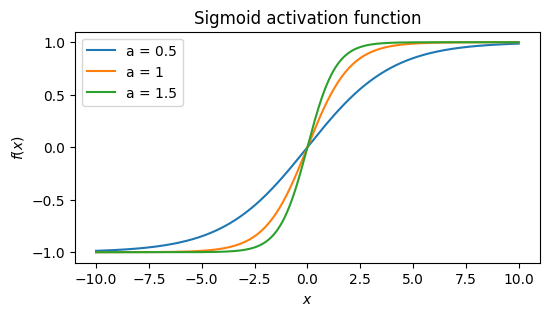

In [10]:
plot_sigmoid(.5, 1, 1.5)

#### b) Hyperbolic tangent function

In [11]:
def plot_tanh(a1, a2, a3):

    x = np.linspace(-10, 10, 1000)
    y1 = np.tanh(a1*x)
    y2 = np.tanh(a2*x)
    y3 = np.tanh(a3*x)

    fig = plt.figure(figsize=(6, 3))
    
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    
    plt.xlabel("$x$")
    plt.ylabel("$g(x)$")

    plt.legend([f'a = {a1}', f'a = {a2}', f'a = {a3}'])
    plt.title("Hyperbolic tangent activation function")

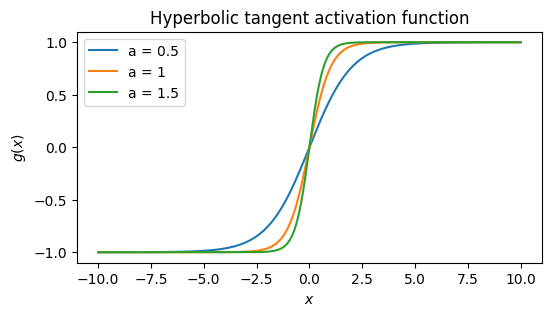

In [12]:
plot_tanh(.5, 1, 1.5)

### c) Piecewise linear function

In [13]:
def piecewise_linear(a, x):
    if x <= -1/a:
        return -1
    elif -1/a < x < 1/a:
        return a*x
    else:
        return 1

In [14]:
def plot_piecewise_linear(a1, a2, a3):

    def piecewise_linear(a, x):
        if x <= -1/a:
            return -1
        elif -1/a < x < 1/a:
            return a*x
        else:
            return 1

    x = np.linspace(-10, 10, 1000)
    y1 = [piecewise_linear(a1, xi) for xi in x]
    y2 = [piecewise_linear(a2, xi) for xi in x]
    y3 = [piecewise_linear(a3, xi) for xi in x]

    fig = plt.figure(figsize=(6, 3))
    
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    
    plt.xlabel("$x$")
    plt.ylabel("$h(x)$")

    plt.legend([f'a = {a1}', f'a = {a2}', f'a = {a3}'])
    plt.title("Piecewise Linear function")

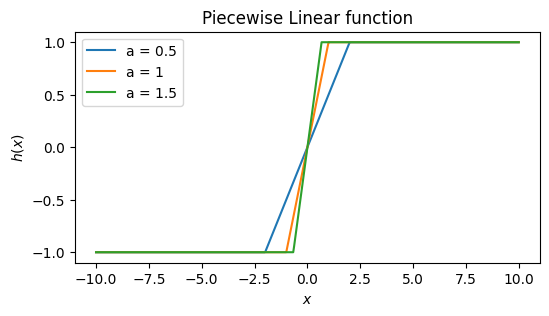

In [15]:
plot_piecewise_linear(.5, 1, 1.5)

We just need to set the parameter $a$ big enough. For example:

C:\Users\alegza\AppData\Local\Temp\ipykernel_9784\2794667910.py:4: RuntimeWarning: overflow encountered in exp
  return 2/(1 + np.exp(-a*x)) - 1


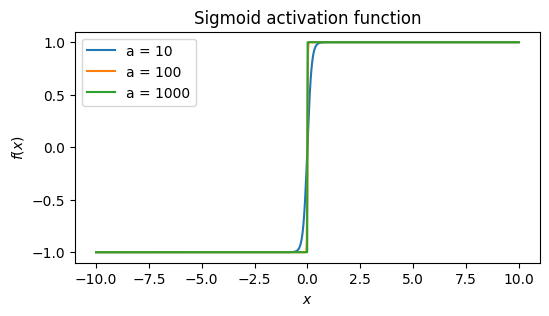

In [16]:
plot_sigmoid(10, 100, 1000)

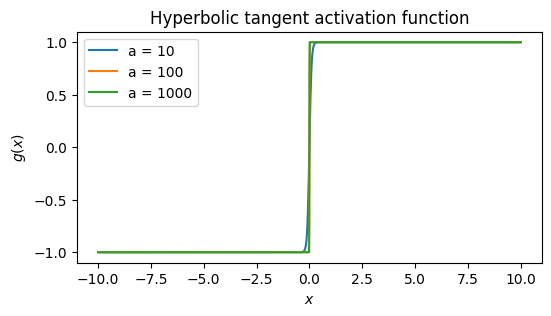

In [17]:
plot_tanh(10, 100, 1000)

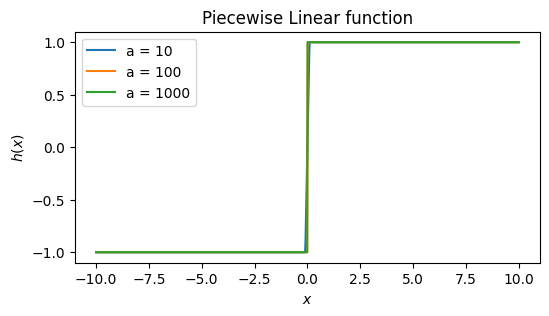

In [18]:
plot_piecewise_linear(10, 100, 1000)

### 3. Rosenblatt's Perceptron

#### a)

In [19]:
#defining the training set
N = 1000
X_train = rng.standard_normal((N, 2))
X_train = np.hstack((-np.ones((N, 1)), X_train))
X_train[:10]

array([[-1.        ,  1.59777721,  0.44287552],
       [-1.        ,  0.40821543, -0.96506678],
       [-1.        , -0.88602812, -0.44414343],
       [-1.        , -1.54370735, -0.15083739],
       [-1.        , -1.19275067,  0.2686129 ],
       [-1.        ,  1.79503243,  0.47229044],
       [-1.        ,  0.6565819 , -0.45283222],
       [-1.        ,  1.07657657, -0.39174439],
       [-1.        , -0.62435265, -0.43551258],
       [-1.        , -0.42197685, -0.11799472]])

In [20]:
X_train.shape

(1000, 3)

In [21]:
#defining the target vector for the training set
d_train = np.array([1 if x[2]-x[1] >= .5 else -1 for x in X_train])
d_train = d_train.reshape(1000, 1)
d_train[:10]

array([[-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])

#### b)

In [22]:
#initialize the weight vector
w = np.zeros((1, 3))

#set the learning rate
lr = .1
epoch = 0

#training the neuron
while epoch < 10**5:
    epoch += 1
    w_old = w.copy()

    #updating the weights
    for k, x in enumerate(X_train):
        w += lr*(d_train[k] - np.sign(w@x))*x
        
    #comparing if the weights changed from the previous epoch    
    if (w == w_old).all():
        print(f'The training finished in {epoch} epochs.')
        print(f'The final weight vector: {w}')
        break
        
else:
    print(f'The algorithm did not converge after {epoch} epochs.')

The training finished in 9 epochs.
The final weight vector: [[ 1.1        -2.19504749  2.17278969]]


In [23]:
#checking how our model performs on the training set
acc = (d_train ==  np.sign(X_train@w.T)).sum()/N

print(f'The model performs with {acc*100}% accuracy on the training set.')

The model performs with 100.0% accuracy on the training set.


We decided to use small (but not too small!) value for $\eta$, so that the values of the final weight vector $\textbf{w}$ don't blow-up. 

#### c)

In [24]:
#defining the validation set
X_valid = rng.standard_normal((N, 2))
X_valid = np.hstack((-np.ones((N, 1)), X_valid))

#defining  the target vector for the validation set
d_valid = np.array([1 if x[2]-x[1] >= .5 else -1 for x in X_valid])
d_valid = d_valid.reshape(1000, 1)

In [25]:
#checking how our model performs on the validation set
acc = (d_valid ==  np.sign(X_valid@w.T)).sum()/N

print(f'The model performs with {acc*100}% accuracy on the validation set.')

The model performs with 99.9% accuracy on the validation set.


#### d)

In [26]:
#making dataframe out of the training set, to make plotting easier
train_set = np.hstack((X_train[:, 1:], d_train))
df_train_set = pd.DataFrame(train_set, columns=['x1', 'x2', 'd'])
df_train_set.head()

,x1,x2,d
0,1.597777,0.442876,-1.0
1,0.408215,-0.965067,-1.0
2,-0.886028,-0.444143,-1.0
3,-1.543707,-0.150837,1.0
4,-1.192751,0.268613,1.0


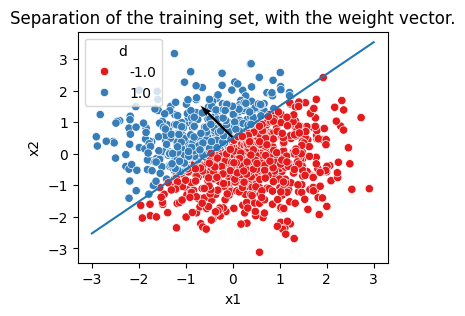

In [27]:
w = w.ravel()

#the decision boundary equation
x1 = np.linspace(-3, 3, 1000)
x2 = -x1*(w[1]/w[2]) + (w[0]/w[2])

fig = plt.figure(figsize=(4, 3))

#the training set
sns.scatterplot(data=df_train_set, x='x1', y='x2', hue='d', palette='Set1');

#the decision boundary
plt.plot(x1, x2)

#the weight vector
plt.quiver(x1[500], x2[500], w[1], w[2], scale=21)

plt.title('Separation of the training set, with the weight vector.');

Decision boundary is a line orthogonal to vector $(w_1, w_2)$ and given by the equation

$$x_1w_1 + x_2w_2 - w_0 = 0.$$

The weight vector is optimal in a sence that determines the decision boundary which perfectly separates two classes. 

### 4. Linear Separability

#### a)

In [28]:
#defining the training set
N = 1000
X_train = rng.standard_normal((N, 2))
X_train = np.hstack((-np.ones((N, 1)), X_train))
X_train[:10]

array([[-1.        , -0.90286305, -2.17742402],
       [-1.        ,  1.88914445, -0.14877927],
       [-1.        ,  0.4073816 , -0.4328634 ],
       [-1.        , -0.27149695, -0.84523149],
       [-1.        , -1.12027308, -0.67852874],
       [-1.        ,  0.56469782, -1.40579299],
       [-1.        ,  0.37134317,  0.27071827],
       [-1.        , -0.47015459, -1.95674652],
       [-1.        ,  1.14711798, -1.03218562],
       [-1.        , -0.01734606, -2.15867101]])

In [29]:
#defining the target vector for the training set
y_train = -np.sign(X_train[:, 1])*np.sign(X_train[:, 2])
y_train = y_train.reshape(1000, 1)
y_train[:10]

array([[-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.]])

In [30]:
#making dataframe out of the training set, to make plotting easier
train_set = np.hstack((X_train[:, 1:], y_train))
df_train_set = pd.DataFrame(train_set, columns=['x1', 'x2', 'd'])
df_train_set.head()

,x1,x2,d
0,-0.902863,-2.177424,-1.0
1,1.889144,-0.148779,1.0
2,0.407382,-0.432863,1.0
3,-0.271497,-0.845231,-1.0
4,-1.120273,-0.678529,-1.0


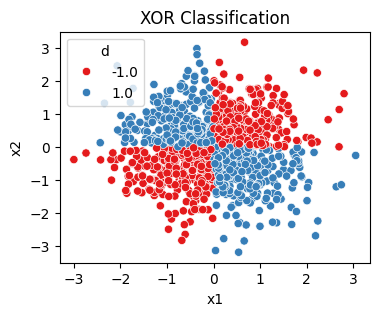

In [31]:
#plotting the training set
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(data=df_train_set, x='x1', y='x2', hue='d', palette='Set1')
plt.title("XOR Classification");

#### b)

In [32]:
#atteming the train the neuron
w = np.zeros((1, 3))
lr = .1
epoch = 0
while epoch < 10**2:
    epoch += 1
    w_old = w.copy()
    print(w)
    for k, x in enumerate(X_train):
        w += lr*(y_train[k] - np.sign(w@x))*x
    if (w == w_old).all():
        break
        print(f'The training finished in {epoch} epochs.')
        print(f'The final weight vector: {w}')

else:
    print(f'The algorithm did not converge after {epoch} epochs.')

[[0. 0. 0.]]
[[-0.1        -0.36113428  0.37871278]]
[[-0.1        -0.32059642  0.02643883]]
[[-0.3        -0.10912557  0.23269366]]
[[-0.1        -0.32641435  0.02778306]]
[[-0.1        -0.26291053  0.12922434]]
[[-0.3        -0.10830084  0.2369243 ]]
[[-0.1        -0.27730443  0.08081046]]
[[-0.1        -0.2707802   0.09722561]]
[[-0.1        -0.3591578   0.37765732]]
[[-0.3        -0.19255613  0.22430578]]
[[-0.1        -0.37881031  0.11250769]]
[[-0.1        -0.40505542  0.10849025]]
[[-0.1        -0.27152968  0.06973953]]
[[-0.1        -0.37891263  0.09370029]]
[[-0.1        -0.42679278  0.07195341]]
[[-0.1        -0.41143162  0.13555927]]
[[-0.1        -0.3283267   0.08297041]]
[[-0.1        -0.2665218   0.09577366]]
[[-0.1        -0.32073765  0.02349497]]
[[-0.3        -0.21346791  0.21570151]]
[[-0.3        -0.16664429  0.24799538]]
[[-0.3        -0.11793247  0.2351103 ]]
[[-0.1        -0.39797483  0.08591889]]
[[-0.1        -0.42934833  0.37009947]]
[[-0.1        -0.32847798  

For the sake of demonstration we limited the algorithm to 100 epochs, but it wouldn't have converged for any preset number of epochs. We see that the entries of the weight vector keep changing signs with almost every iteration.

#### d)
(speculation) Maybe 14 of 16 operations could be learn by perceptron, since they form (piecewise) linearly separable data, i.e. could be transformed to linearly separate data. Only two operations that do not form linearly separable data are XOR and equivalence (XNOR).